In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_board():
    return np.zeros ((3,3))

def place(board, player, position):
    if board[position] == 0:
        board[position] = player

def possibilities(board):
    empty = np.where(board == 0)
    return list(zip(empty[0], empty[1]))

selection = []
def random_place(board, player):
    selection = possibilities(board)
    if len(selection) > 0:
        choice = random.choice(selection)
        place(board, player, choice)
    return board

def check_win(row, player):
    for marker in row:
        if marker != player:
            return False
    return True

def row_win(board, player):
    for row in board:
        if check_win(row, player):
            return True
    return False

def col_win(board, player):
    for col in board.T:
        if check_win(col, player):
            return True
    return False

def diag_win(board, player):
    main_diag = board.diagonal()
    anti_diag = np.flipud(board).diagonal()[::-1]
    return check_win(main_diag, player) or check_win(anti_diag, player)

def evaluate(board):
    winner = 0
    for player in [1, 2]:
        won = row_win(board, player) or col_win(board, player) or diag_win(board, player)
        if won:
            winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

def play_game():
    board = create_board()
    while True:
        for player in [1, 2]:
            random_place(board, player)
            result = evaluate(board)
            if result != 0:
                return result
            
def play_strategic_game():
    board, winner = create_board(), 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            board = random_place(board, player)
            winner = evaluate(board)
            if winner != 0:
                break
    return winner

board = create_board()

In [3]:
board = create_board() 
place(board, 1, (0,0))

In [4]:
print(possibilities(board))

[(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [5]:
print(random_place(board, 2))

[[1. 0. 2.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [6]:
board = create_board()
for i in range(3):
    for player in [1,2]:
        random_place(board, player)

print(board)

[[2. 0. 2.]
 [2. 0. 0.]
 [1. 1. 1.]]


In [7]:
print(row_win(board, 1))

True


In [8]:
print(col_win(board, 1))

False


In [9]:
print(diag_win(board, 1))

False


In [10]:
print(evaluate(board))

1


In [11]:
play_game()

1

0.6585817337036133


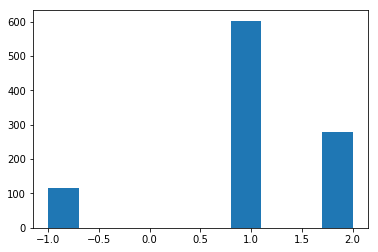

In [12]:
start = time.time()
results = []
for i in range(1000):
    results.append(play_game())
    
stop = time.time()
print(stop-start)

plt.hist(results)
plt.show()

In [13]:
play_strategic_game()

1

0.5574314594268799


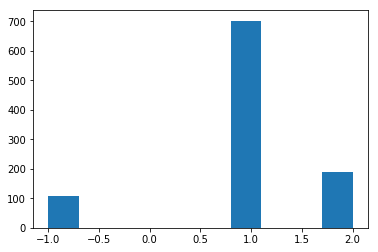

In [14]:
start = time.time()
results = []
for i in range(1000):
    results.append(play_strategic_game())
    
stop = time.time()
print(stop-start)

plt.hist(results)
plt.show()